<h2 style="color:lightgreen">Random Forests</h2>

<h2> Large amounts of the code imported are abstracted away</h2>
<h3 style="color:lightgreen">The code that is imported is similar to the Decision Tree

In [3]:
import model
import pandas as pd
import dec
import accuracy
from statistics import mode

In [4]:
dataset = pd.read_csv("tennis.csv",header=None,names=["Outlook","Temperature","Humidity","Windy","Play"])
features=["Outlook","Temperature","Humidity","Windy"]

In [5]:
dataset = dataset.sample(frac=1)

<p style="color:salmon">Split the dataset</p>

In [6]:
def split_data(dataset):
	split = len(dataset) * 50//100
	train = dataset.iloc[:split].reset_index(drop=True)
	return train

<h3 style="color:salmon"> The Random Forest Algorithm: Highly Abstracted </h3>

In [7]:
def random_forest_model(dataset,num_trees):
	random_forest = []
	for i in range(num_trees):
		bootstrap_sample = dataset.sample(frac=1,replace=True)
		bootstrap_train = split_data(bootstrap_sample)
		tree = model.decision_tree(bootstrap_train,bootstrap_train)
		random_forest.append(tree)
	return random_forest


<h3 style="color:#f9f9f9">Predict an instance </h3>

In [8]:
def forest_predict(forest,query):
	predicts = []
	for i in range(len(forest)):
		# if prediction is a dictionary that means, the tree does not give a value 
		prediction = accuracy.predict(forest[i],query)
		filt = filter_pred(prediction)
		predicts.append(filt)
	return predicts

<h3 style="color:gray">This method filters the results from a prediction</h3>

In [9]:
def filter_pred(prediction):
	if type(prediction) == list:
		if type(prediction[0]) == dict:
			pred = dec.get_leaves(prediction[0])
			return dec.get_mode(pred)
		else:
			return prediction[0]
	elif type(prediction) == dict:
		pred = dec.get_leaves(prediction)
		return dec.get_mode(pred)
	else:
		return prediction

In [10]:
def predict_testing_data(forest,test_data):
	prediction_class = []
	for row in range(len(test_data)):
		query = list(test_data.iloc[row,:-1])
		decision = forest_predict(forest,query)
		prediction_class.append(dec.get_mode(decision))
	return prediction_class


<h2 style="color:lightgreen">The Random Forest Method</h2>

In [11]:

def random_forest(dataset):
	split = len(dataset) * 50//100
	testing_data = dataset.iloc[split:].reset_index(drop=True)
	print(testing_data)
	forest = random_forest_model(dataset,10)
	actual_data = list(testing_data.iloc[:,-1])
	predicted_data = predict_testing_data(forest,testing_data)
	# print("Actual Data",actual_data)
	# print("Predicted Data",predicted_data)

	# Generalise later
	actual_n = accuracy.convert_first(actual_data)
	predicted_n = accuracy.convert_first(predicted_data)
	# print("Actual",actual_n)
	# print("Predicted",predicted_n)
	data = {"y_act":actual_n,"y_pred":predicted_n}
	df = pd.DataFrame(data,columns = ["y_act","y_pred"])
	conf_matrix = pd.crosstab(df["y_act"],df["y_pred"],rownames=["Actual"],colnames=["Predicted"],margins=True,margins_name="Total")
	print()
	print("Confusion Matrix")
	print(conf_matrix)
	TP = conf_matrix[1][1]
	TN = conf_matrix[0][0]
	FP = conf_matrix[1][0]
	FN = conf_matrix[0][1]
	acc = accuracy.accuracy(TP,TN,FP,FN)
	recall = accuracy.recall(TP,FN)
	precision = accuracy.precision(TP,FP)
	f_measure_data = accuracy.f_measure(recall,precision)
	print("Accuracy: ",acc)
	print("Recall: ",recall)
	print("Precision: ",precision)
	print("F Measure: ",f_measure_data)
	accuracy.show_heatmap(conf_matrix)

    Outlook Temperature Humidity   Windy Play
0     Sunny        Mild   Normal  Strong  Yes
1  Overcast         Hot   Normal    Weak  Yes
2     Sunny        Cool   Normal    Weak  Yes
3     Rainy        Cool   Normal    Weak  Yes
4     Sunny        Mild     High    Weak   No
5  Overcast        Mild     High  Strong  Yes
6     Rainy        Cool   Normal  Strong   No

Confusion Matrix
Predicted  0  1  Total
Actual                
0          1  1      2
1          0  5      5
Total      1  6      7
Accuracy:  0.857142857143
Recall:  1.0
Precision:  0.833333333333
F Measure:  0.909090909091


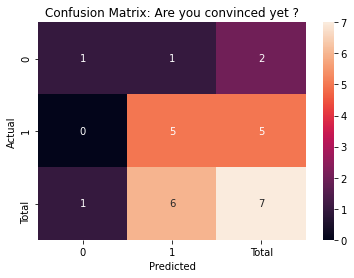

In [13]:
random_forest(dataset)